ЗАВДАННЯ

Створити автокодувальник для датасету рукописних цифр за допомогою бібліотеки Keras (використовуємо тільки звичайні шари).
1. Побудувати автокодувальник без шуму, графік функції втрат, результати розпізнавання.

2. Побудувати автокодувальник із шумом, графік функції втрат, результати розпізнавання.

Розподіл векторів прихованого шару за бажанням.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers, models
from sklearn.manifold import TSNE

In [ ]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = np.reshape(x_train, (len(x_train), 28 * 28))
x_test = np.reshape(x_test, (len(x_test), 28 * 28))

input_img = layers.Input(shape=(784,))

In [ ]:
# Енкодер
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

# Декодер
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

decoded_imgs = autoencoder.predict(x_test)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.3419 - val_loss: 0.1709
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.1600 - val_loss: 0.1368
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.1350 - val_loss: 0.1246
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.1241 - val_loss: 0.1180
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1182 - val_loss: 0.1132
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.1132 - val_loss: 0.1092
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.1095 - val_loss: 0.1064
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1072 - val_loss: 0.1050
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.1054 - val_loss: 0.1044
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1039 - val_loss: 0.1021
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.1020 - val_loss: 0.1004
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

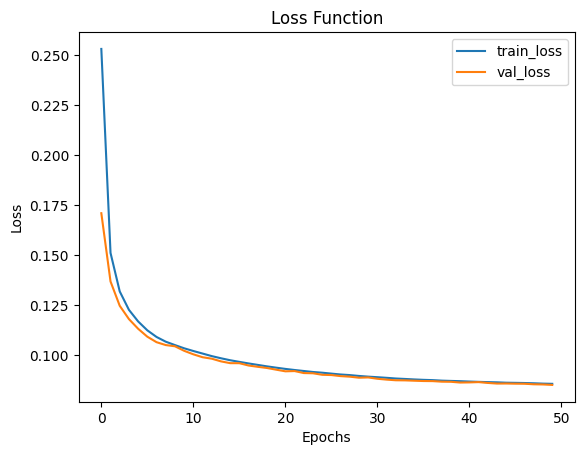

In [ ]:
# графік функції втрат

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

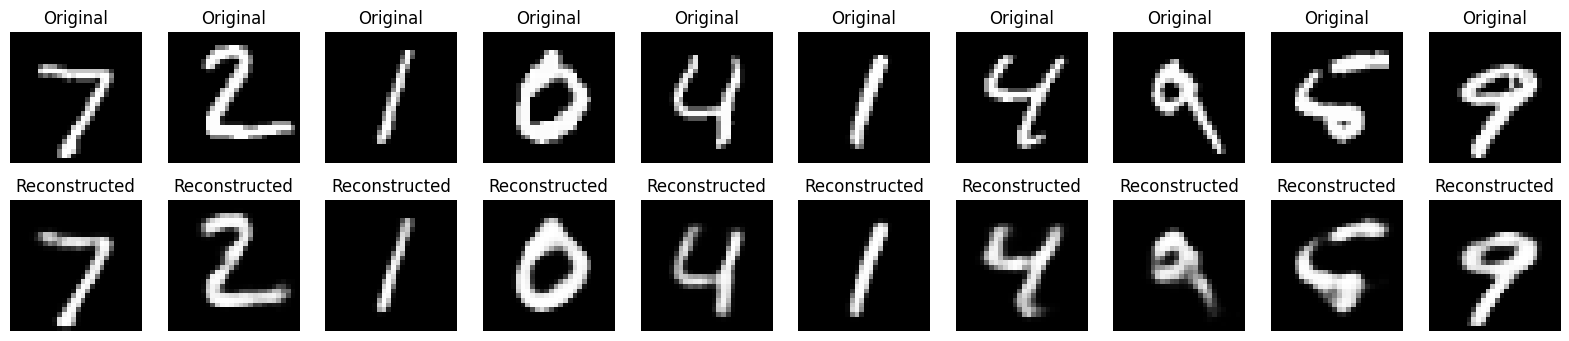

In [ ]:
num_images = 10
plt.figure(figsize=(20, 4))

for i in range(num_images):
    original_ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.gray()
    original_ax.axis('off')

    reconstructed_ax = plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.gray()
    reconstructed_ax.axis('off')

plt.show()

ВИСНОВКИ
   - Відновлені зображення досить добре відтворюють основні форми оригінальних цифр, що свідчить про ефективність моделі у навчанні стиснення та декодування.
   - Однак є деякі незначні втрати якості та нечіткість, які можуть вказувати на те, що модель не до кінця змогла відновити дрібні деталі. Це є очікуваним результатом при використанні звичайних автокодувальників без додаткових удосконалень, таких як регуляризація або глибші архітектури.

В цілому, автокодувальник показав здатність навчатись витягати ознаки з даних та успішно відновлювати їх, хоч і з певною втратою якості.

In [ ]:
# Функція для додавання шуму
def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    return np.clip(noisy_images, 0., 1.)  # Обмежуємо значення в межах [0, 1]

In [ ]:
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

history_noisy = autoencoder.fit(x_train_noisy, x_train,
                                 epochs=50,
                                 batch_size=256,
                                 shuffle=True,
                                 validation_data=(x_test_noisy, x_test))

decoded_imgs_noisy = autoencoder.predict(x_test_noisy)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1825 - val_loss: 0.1315
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.1291 - val_loss: 0.1245
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1236 - val_loss: 0.1215
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.1217 - val_loss: 0.1208
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1205 - val_loss: 0.1200
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1198 - val_loss: 0.1193
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.1189 - val_loss: 0.1190
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1183 - val_loss: 0.1193
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1181 - val_loss: 0.1183
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1178 - val_loss: 0.1180
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.1174 - val_loss: 0.1177
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━

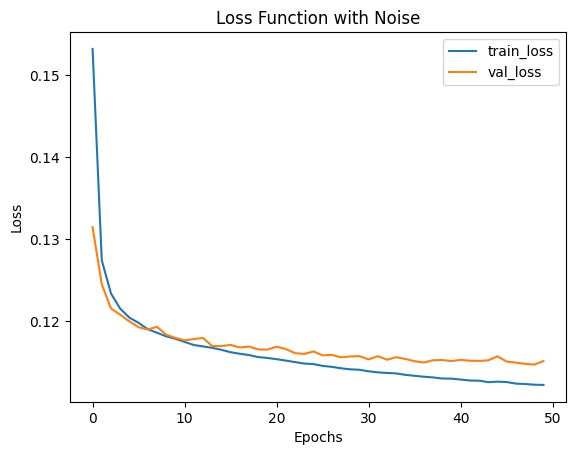

In [ ]:
plt.plot(history_noisy.history['loss'], label='train_loss')
plt.plot(history_noisy.history['val_loss'], label='val_loss')
plt.title('Loss Function with Noise')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

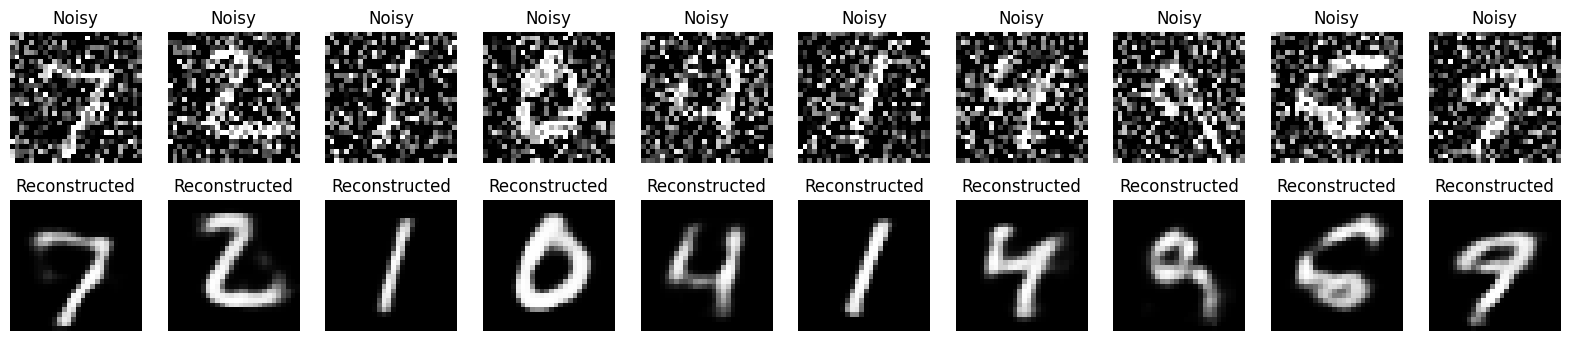

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis("off")

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


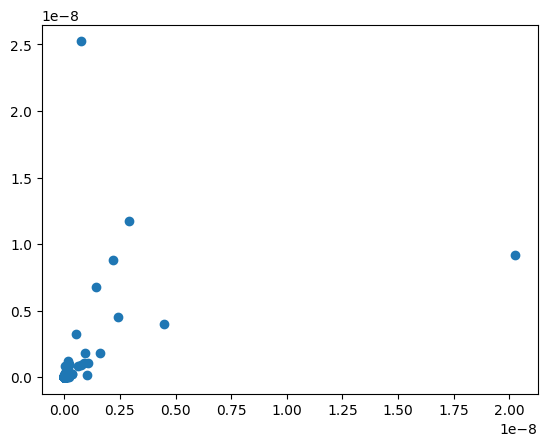

In [ ]:
h = autoencoder.predict(x_test)
plt.scatter(h[:, 0], h[:, 1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


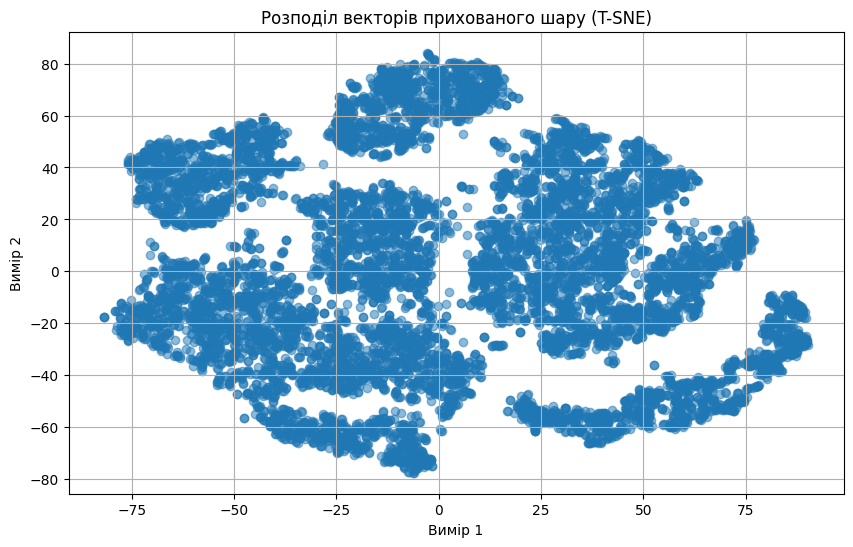

In [ ]:
encoder = models.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

# Зменшення розмірності до 2D за допомогою T-SNE
tsne = TSNE(n_components=2, random_state=42)
encoded_2d = tsne.fit_transform(encoded_imgs)

# Візуалізація розподілу векторів
plt.figure(figsize=(10, 6))
plt.scatter(encoded_2d[:, 0], encoded_2d[:, 1], alpha=0.5)
plt.xlabel('Вимір 1')
plt.ylabel('Вимір 2')
plt.title('Розподіл векторів прихованого шару (T-SNE)')
plt.grid()
plt.show()

Графік показує зменшення вимірності вихідних даних до двох вимірів для візуалізації структури даних у прихованому шарі автокодувальника. Кластеризація говорить про те, що моделі вдалося відокремити певні рукописні цифри за їх характерними ознаками, але класи можуть дещо перекриватися. Це може вказувати на зони, де модель менш впевнена у відмінностях між цифрами.